In [162]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import seaborn as sns

In [163]:
# Load the data from the external CSV file into a Pandas DataFrame
file_path = '../result-linear-3.csv'  # Replace with the actual path to your CSV file
df = pd.read_csv(file_path)


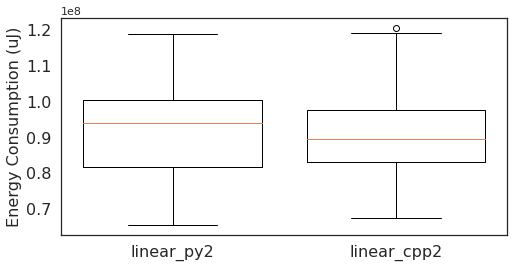

In [164]:
# CPU Energy Consumption (uJ)

plt.figure(figsize=(8, 4))
plt.ylabel('Energy Consumption (uJ)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

labels = ['linear_py2','linear_cpp2']
data_to_plot = [df[df['label'] == label]['pkg'] for label in labels]

#plt.ylim(1.2*1e8, 1.8*1e8)

plt.boxplot(data_to_plot, widths=0.8,labels=labels)

plt.savefig('figs/whisker_linear_cpu.pdf')

plt.show()

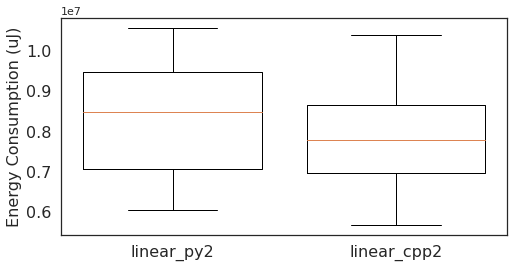

In [165]:
# DRAM Energy Comsumption (uJ)

plt.figure(figsize=(8,4))
plt.ylabel('Energy Consumption (uJ)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

labels = ['linear_py2', 'linear_cpp2']
data_to_plot = [df[df['label'] == label]['dram'] for label in labels]

#plt.ylim(1.5*1e7, 4*1e7)

plt.boxplot(data_to_plot, widths=0.8, labels=labels)

plt.savefig('figs/whisker_linear_dram.pdf')

plt.show()

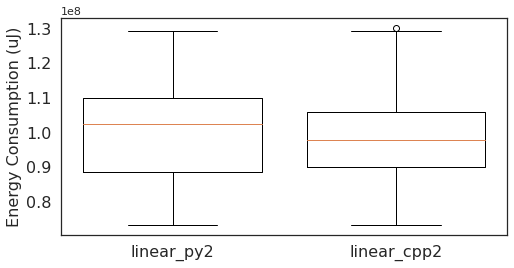

In [166]:
# Cumulative Energy Comsumption (uJ)

plt.figure(figsize=(8, 4))
plt.ylabel('Energy Consumption (uJ)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

df['cpu_dram'] = df['pkg'] + df['dram']
data_to_plot = [df[df['label'] == label]['cpu_dram'] for label in labels]

#plt.ylim(1.4*1e8, 2*1e8)

plt.boxplot(data_to_plot, widths=0.8, labels=labels)

plt.savefig('figs/whisker_linear_ec_total.pdf')

plt.show()

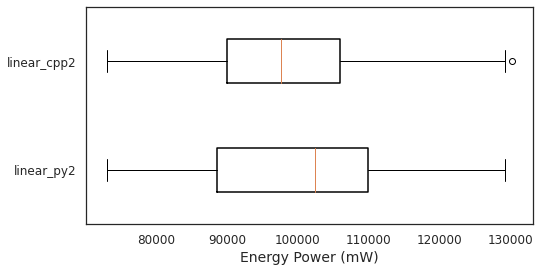

In [191]:
# Cumulative Energy Comsumption (mJ)
plt.figure(figsize=(8, 4))
# plt.ylabel('Energy Consumption (mJ)',  fontsize=16)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)

df['cpu_dram_mj'] = df['cpu_dram'] / 1000
data_to_plot = [df[df['label'] == label]['cpu_dram_mj'] for label in labels]

#plt.ylim(1.4*1e5, 2*1e5)

plt.boxplot(data_to_plot, vert=False, widths=0.4, patch_artist=False, boxprops=dict(linewidth=1.5))

plt.xlabel('Energy Power (mW)',  fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(range(1, len(labels) + 1), labels, fontsize=12)

# plt.boxplot(data_to_plot, widths=0.4, labels=labels, boxprops=dict(linewidth=1))

plt.savefig('figs/whisker_linear_ec_mj_total.pdf')

plt.show()

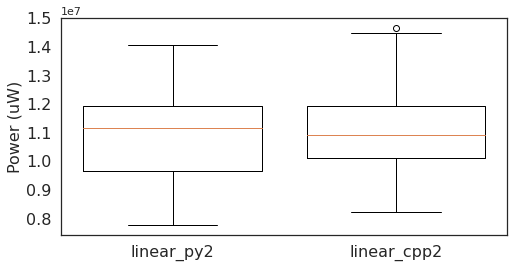

In [168]:
# Cumulative Power

plt.figure(figsize=(8, 4))
plt.ylabel('Power (uW)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Calculate power (in uW) by dividing energy consumption (pkg, uJ) by time (duration, us)
df['power_uw'] = (df['pkg'] * 1e6) / df['duration']  # Power in micro-watts (uW)

data_to_plot = [df[df['label'] == label]['power_uw'] for label in labels]

#plt.ylim(0.00225*1e6, 0.004*1e6)

plt.boxplot(data_to_plot, widths=0.8, labels=labels)

plt.savefig('figs/whisker_pubsub_power_uw_total.pdf')

plt.show()

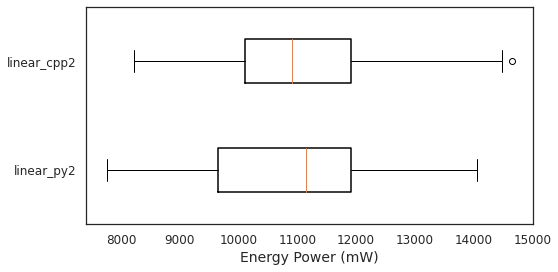

In [189]:
# Cumulative Power (mW)

plt.figure(figsize=(8, 4))
#plt.xlabel('ROS Algorithm',  fontsize=20)
# plt.ylabel('Power (mW)',  fontsize=18)
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)

# Calculate power (in uW) by dividing energy consumption (pkg, uJ) by time (duration, us)
df['power_uw'] = (df['pkg'] * 1e6) / df['duration']  # Power in micro-watts (uW)
df['power_mw'] = df['power_uw'] / 1000

data_to_plot = [df[df['label'] == label]['power_mw'] for label in labels]

#plt.ylim(2.4, 3.4)

# plt.boxplot(data_to_plot, widths=0.4, labels=labels, boxprops=dict(linewidth=1))

plt.boxplot(data_to_plot, vert=False, widths=0.4, patch_artist=False, boxprops=dict(linewidth=1.5))

plt.xlabel('Energy Power (mW)',  fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(range(1, len(labels) + 1), labels, fontsize=12)

plt.savefig('figs/whisker_linear_power_mw_total.pdf')

plt.show()

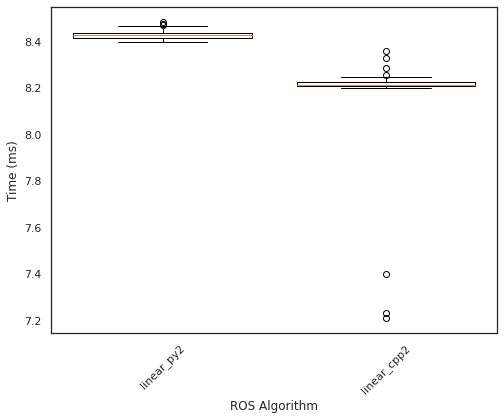

In [170]:
# Execution Time

plt.figure(figsize=(8, 6))
plt.xlabel('ROS Algorithm')
plt.ylabel('Time (ms)')
plt.xticks(rotation=45)

# Calculate power (in uW) by dividing energy consumption (pkg, uJ) by time (duration, us)
df['time'] = df['duration'] / 1000000 # Power in micro-watts (uW)

data_to_plot = [df[df['label'] == label]['time'] for label in labels]

#plt.ylim(5.05*1e7, 5.275*1e7)
#plt.ylim(50.5*1e3, 53.25*1e3)

plt.boxplot(data_to_plot, widths=0.8, labels=labels)

plt.savefig('figs/whisker_pubsub_exec_time.pdf')

plt.show()

In [171]:
# Statistics

mean_power_by_label = df.groupby('label')['cpu_dram_mj'].mean()
print(mean_power_by_label)

max_power_by_label = df.groupby('label')['cpu_dram_mj'].max()
print(max_power_by_label)

min_power_by_label = df.groupby('label')['cpu_dram_mj'].min()
print(min_power_by_label)

avg_power_by_label = df.groupby('label')['cpu_dram_mj'].median()
print(avg_power_by_label)

std_power_by_label = df.groupby('label')['cpu_dram_mj'].std()
print(std_power_by_label)

label
linear_cpp     110266.823592
linear_cpp1    106963.709515
linear_cpp2     98339.141599
linear_cpp3    118907.918150
linear_py      103271.001648
linear_py2      99439.853500
linear_py3     113239.743630
Name: cpu_dram_mj, dtype: float64
label
linear_cpp     155527.434
linear_cpp1    141442.326
linear_cpp2    130247.408
linear_cpp3    142623.415
linear_py      169817.802
linear_py2     129156.408
linear_py3     140535.468
Name: cpu_dram_mj, dtype: float64
label
linear_cpp     85038.845
linear_cpp1     4344.350
linear_cpp2    73079.097
linear_cpp3    94385.377
linear_py      72080.748
linear_py2     73008.359
linear_py3     87665.791
Name: cpu_dram_mj, dtype: float64
label
linear_cpp     110942.3430
linear_cpp1    110448.8750
linear_cpp2     97577.2640
linear_cpp3    118936.3715
linear_py      100973.1300
linear_py2     102372.6630
linear_py3     112332.9030
Name: cpu_dram_mj, dtype: float64
label
linear_cpp     11573.291237
linear_cpp1    18647.722386
linear_cpp2    11523.970406
l

In [172]:
df.mode()

,label,timestamp,duration,pkg,dram,socket,cpu_dram,cpu_dram_mj,power_uw,power_mw,time
0,linear_cpp1,1.696638e+09,798233.961,100457628.0,6441390.0,0.0,4344350.0,4344.350,4.611686e+06,4611.685521,0.798234
1,NaN,1.696638e+09,3736573.123,NaN,6852339.0,NaN,41828140.0,41828.140,7.755284e+06,7755.283938,3.736573
2,NaN,1.696638e+09,3763909.301,NaN,NaN,NaN,47198427.0,47198.427,8.058145e+06,8058.144867,3.763909
3,NaN,1.696638e+09,6752246.461,NaN,NaN,NaN,67432505.0,67432.505,8.190238e+06,8190.237725,6.752246
4,NaN,1.696638e+09,7210310.159,NaN,NaN,NaN,69849674.0,69849.674,8.217648e+06,8217.648429,7.210310
...,...,...,...,...,...,...,...,...,...,...,...
773,NaN,1.696688e+09,8762636.354,NaN,NaN,NaN,141442326.0,141442.326,1.691307e+07,16913.065253,8.762636
774,NaN,1.696688e+09,8766048.412,NaN,NaN,NaN,142623415.0,142623.415,1.722586e+07,17225.864322,8.766048
775,NaN,1.696688e+09,8773010.247,NaN,NaN,NaN,147994555.0,147994.555,1.784336e+07,17843.363871,8.773010
776,NaN,1.696688e+09,8810157.685,NaN,NaN,NaN,155527434.0,155527.434,1.865699e+07,18656.985448,8.810158


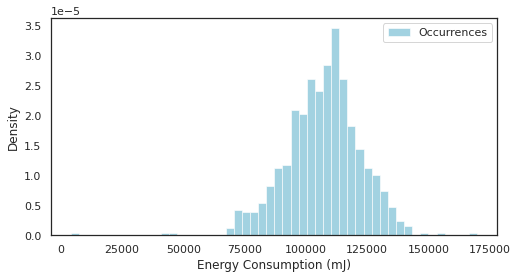

In [173]:
# Skewed Distribution Graph
data = df['cpu_dram_mj']

# Create a histogram to visualize the skewed distribution
plt.figure(figsize=(8, 4))
plt.hist(data, bins=50, density=True, alpha=0.6, color='c', label='Occurrences')

# Add labels and title
plt.xlabel('Energy Consumption (mJ)')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [174]:
py_data = df[df['label'] == 'linear_py2']['cpu_dram_mj']
cpp_data = df[df['label'] == 'linear_cpp2']['cpu_dram_mj']

In [175]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(py_data, cpp_data)

In [176]:
# Set the significance level
alpha = 0.05

# Print the results
print(f'F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Perform a hypothesis test
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference between groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference between groups.')

F-statistic: 0.4486
P-value: 0.5037
Fail to reject the null hypothesis: There is no significant difference between groups.


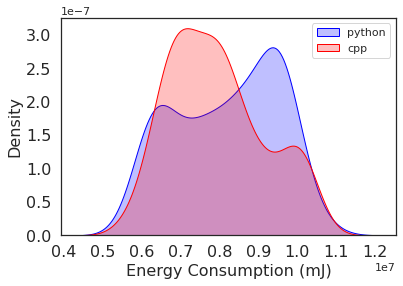

In [197]:
# Set the style for the plots (optional)
sns.set(style="white")

# Create a probability density plot (kernel density plot) for 'pub_py'
sns.kdeplot(py_data, label='python', fill=True, color='blue')

# Create a probability density plot (kernel density plot) for 'pub_cpp'
sns.kdeplot(cpp_data, label='cpp', fill=True, color='red')

# Add labels and a legend
plt.xlabel('Energy Consumption (mJ)',fontsize=16)
plt.ylabel('Density',fontsize=16)
plt.legend()

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.savefig('figs/prob_density_linear_energy_mj.pdf')

# Show the plot
plt.show()

In [178]:
py_data = df[df['label'] == 'linear_py2']['power_mw']
cpp_data = df[df['label'] == 'linear_cpp2']['power_mw']

In [179]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(py_data, cpp_data)

# Set the significance level
alpha = 0.05

# Print the results
print(f'F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Perform a hypothesis test
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference between groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference between groups.')

F-statistic: 1.3084
P-value: 0.2538
Fail to reject the null hypothesis: There is no significant difference between groups.


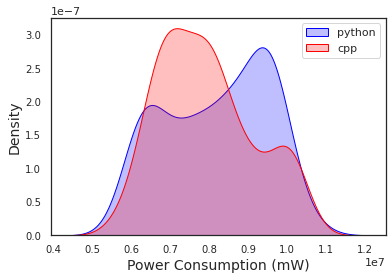

In [198]:
# Set the style for the plots (optional)
sns.set(style="white")

# Create a probability density plot (kernel density plot) for 'pub_py'
sns.kdeplot(py_data, label='python', fill=True, color='blue')

# Create a probability density plot (kernel density plot) for 'pub_cpp'
sns.kdeplot(cpp_data, label='cpp', fill=True, color='red')

# Add labels and a legend
plt.xlabel('Power Consumption (mW)',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.legend()

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig('figs/prob_density_linear_pw_mw.pdf')

# Show the plot
plt.show()

In [194]:
py_data = df[df['label'] == 'linear_py2']['dram']
cpp_data = df[df['label'] == 'linear_cpp2']['dram']

In [195]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(py_data, cpp_data)

# Set the significance level
alpha = 0.05

# Print the results
print(f'F-statistic: {f_statistic:.4f}')
print(f'P-value: {p_value:.4f}')

# Perform a hypothesis test
if p_value < alpha:
    print('Reject the null hypothesis: There is a significant difference between groups.')
else:
    print('Fail to reject the null hypothesis: There is no significant difference between groups.')

F-statistic: 2.9198
P-value: 0.0888
Fail to reject the null hypothesis: There is no significant difference between groups.
